In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv'
df = pd.read_csv(url)

In [3]:
# Check for missing values
print(df.isnull().sum())

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64


In [4]:
# Drop rows with missing values
df.dropna(inplace=True)

In [6]:
# Prepare features and target variables
X = df[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 
        'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1',
        'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 
        'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation']]

y_max = df['Next_Tmax']
y_min = df['Next_Tmin']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_max_train, y_max_test, y_min_train, y_min_test = train_test_split(X, y_max, y_min, test_size=0.2, random_state=42)

In [8]:
# Train a RandomForestRegressor for maximum temperature prediction
rf_max = RandomForestRegressor(random_state=42)
rf_max.fit(X_train, y_max_train)
y_max_pred = rf_max.predict(X_test)

In [9]:
# Evaluate the regressor for maximum temperature
mse_max = mean_squared_error(y_max_test, y_max_pred)
print(f'Next Day Maximum Temperature Prediction Mean Squared Error: {mse_max:.2f}')


Next Day Maximum Temperature Prediction Mean Squared Error: 1.01


In [10]:
# Train a RandomForestRegressor for minimum temperature prediction
rf_min = RandomForestRegressor(random_state=42)
rf_min.fit(X_train, y_min_train)
y_min_pred = rf_min.predict(X_test)

In [11]:
# Evaluate the regressor for minimum temperature
mse_min = mean_squared_error(y_min_test, y_min_pred)
print(f'Next Day Minimum Temperature Prediction Mean Squared Error: {mse_min:.2f}')

Next Day Minimum Temperature Prediction Mean Squared Error: 0.62


In [12]:
# Plotting the results for better visualization
plt.figure(figsize=(14, 7))


<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Maximum Temperature')

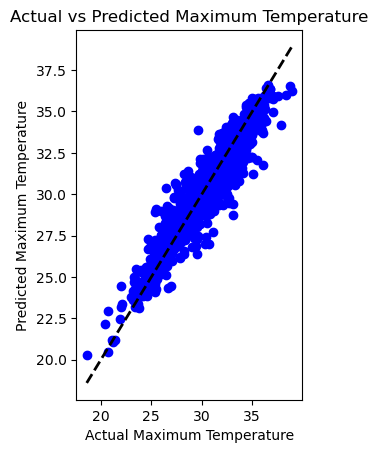

In [13]:
# Maximum Temperature
plt.subplot(1, 2, 1)
plt.scatter(y_max_test, y_max_pred, color='blue')
plt.plot([y_max_test.min(), y_max_test.max()], [y_max_test.min(), y_max_test.max()], 'k--', lw=2)
plt.xlabel('Actual Maximum Temperature')
plt.ylabel('Predicted Maximum Temperature')
plt.title('Actual vs Predicted Maximum Temperature')

Text(0.5, 1.0, 'Actual vs Predicted Minimum Temperature')

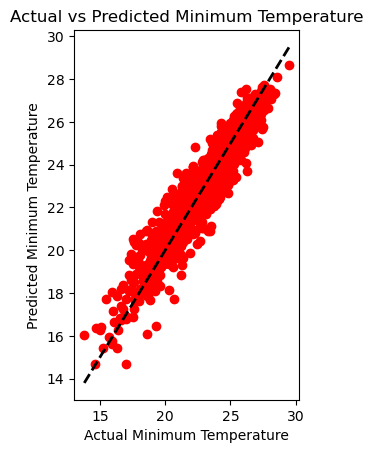

In [14]:
# Minimum Temperature
plt.subplot(1, 2, 2)
plt.scatter(y_min_test, y_min_pred, color='red')
plt.plot([y_min_test.min(), y_min_test.max()], [y_min_test.min(), y_min_test.max()], 'k--', lw=2)
plt.xlabel('Actual Minimum Temperature')
plt.ylabel('Predicted Minimum Temperature')
plt.title('Actual vs Predicted Minimum Temperature')

In [15]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [17]:
# To make predictions on new data
new_data = pd.DataFrame({
    'station': [1],
    'Present_Tmax': [30],
    'Present_Tmin': [20],
    'LDAPS_RHmin': [50],
    'LDAPS_RHmax': [80],
    'LDAPS_Tmax_lapse': [32],
    'LDAPS_Tmin_lapse': [21],
    'LDAPS_WS': [5],
    'LDAPS_LH': [150],
    'LDAPS_CC1': [0.5],
    'LDAPS_CC2': [0.6],
    'LDAPS_CC3': [0.7],
    'LDAPS_CC4': [0.8],
    'LDAPS_PPT1': [5],
    'LDAPS_PPT2': [6],
    'LDAPS_PPT3': [7],
    'LDAPS_PPT4': [8],
    'lat': [37.5],
    'lon': [127.0],
    'DEM': [50],
    'Slope': [3],
    'Solar radiation': [5000]
})

In [18]:
predicted_max = rf_max.predict(new_data)
predicted_min = rf_min.predict(new_data)

print(f'Predicted Next Day Maximum Temperature: {predicted_max[0]:.2f}°C')
print(f'Predicted Next Day Minimum Temperature: {predicted_min[0]:.2f}°C')

Predicted Next Day Maximum Temperature: 31.26°C
Predicted Next Day Minimum Temperature: 19.05°C
